# Курс "Docker"

https://lab.karpov.courses/learning/102/

# Урок 1

## Сущности докера

* Docker daemon: Фоновая программа управляющая  контейнерами на основе образов.

* Images: Образы в докере строится слоями - наборами инструкций.

* Containers: Контейнер - изолированная среда, в которой будет работать наша программа.
Наша среда видит то, что происходит в контейнере, но программа в контейнере не видит то, что снаружи. 


* Docker registry (Репозиторий) - сервер, используемый для хранения образов

* Docker container (Контейнер) - Изолированая среда запуска приложений

* Docker host (Хост) - Компьютер, на котором установлен докер

* Docker daemon (Демон) - Фоновая программа, которая управляет объектами докера

* Docker Image (образ) - Шаблон инструкций по созданию докер контейнера

* Docker client (Клиент) - Интерфейс взаимодействия с демоном

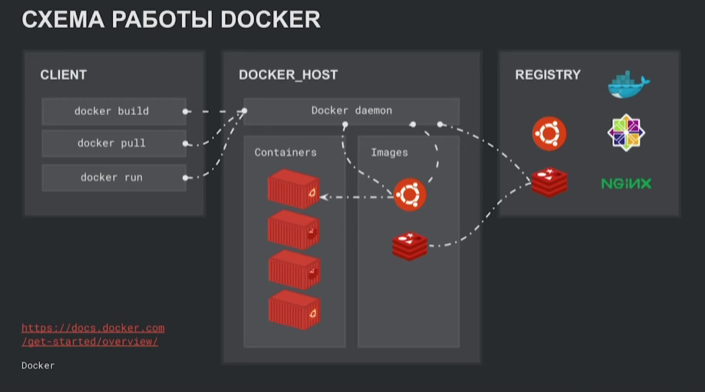

## Установка докера на Windows

Может потребоваться вклчючение компонент Windows:

* Нажмите win+R 
* Наберите optionalfeatures и запустите
* Поставьте галочки для 
1. Платформа виртуальной мащины
2. Hyper-V

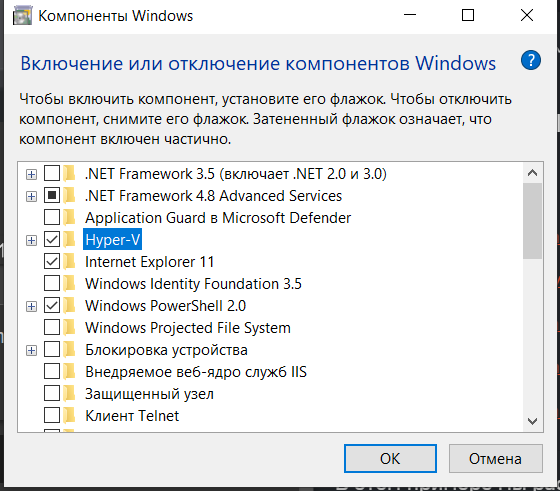

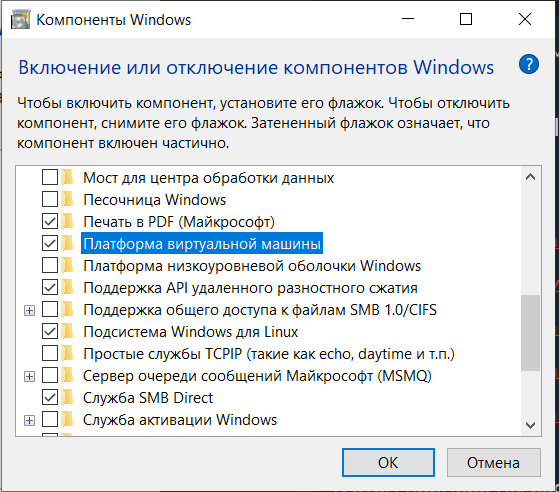

## Применение докер

* Позволяет развернуть несколько разных приложений

* Воспроизводимое окружение

* Удобно развернуть несколько приложений

* Позволяет упаковать программу вместе с ее зависимостями и доставить на сервер

* Легче и проще чем виртуалка

## Места для хранения образов


* Docker Hub

* Собственный, поднятый на сервере, репозиторий

* GitLab Container Registry

* Container Registry от Google Cloud

* Container Registry от GitHub

* Amazon ECR

* Yandex Container Registry

* DigitalOcean Container Registry

# Урок 2

## Первые контейнеры

Докер позволяет переиспользовать слои. 
Если мы работаем с двумя образами, которые имеют одинаковые слои, то Docker не будет создавать их несколько раз, он будет их переиспользовать. Использует кэш.

Образы: 

* Repository 
* TAG
* Image ID
* Created
* Size

Контейнер: 

* Container ID 
* IMAGE - Образ, на основе которого создан контейнер
* Command - Команда запуска
* Created - Время запуска
* Status - Статус контейнера (Up, Exited) 
* Ports
* Names - Имена контейнеров

## Работа контейнера

Контейнер работает, пока в нем работает программа

Возможна ситуация, когда контейнер запущен, но программа внутри еще не инициализировалась. 

## Практика

* ```docker images``` - Выводит список образов
* ```docker ps``` - Выводит список активных/работающих контейнеров
* ```docker ps -a``` - Выводит список всех (-all) контейнеров
* ```docker pull название_образа```
* ```docker pull название_образа:тэг```
* ```docker rmi Название_образа``` - Удаляет образ по названию

Tag alpine ????

* ```docker run название_образа``` - запуск контейнера на основе образа

* ```docker stop имя_контейнера``` - остановка контейнера

* ```docker run -it имя_образа``` - запуск контейнера на основе образа в интерактивном режиме с перехватом контроля

* ```docker rm контейнеры```

* ```docker exec -it контейнер bash``` - подключение к запущенному контейнеру через bash

* ```docker run -d имя_образа``` - запуск контейнера в фоновом режиме

* ```docker run --name новое_имя -d имя_образа``` - запуск контейнера в фоновом режиме с заданным именем

* ```docker run --rm имя_образа``` - запуск контейнера, который после остановки удалится

* ```docker stop $(docker ps -q)``` - остановка всех активных контейнеров

* ```docker commit новое_имя:тэг``` - создание нового образа на основе контейнера


```docker images```

```docker image ls```

```docker images --no-trunc```

```docker images -a```

```docker images -q```

```docker images --format '{{.Repository}}:{{.Tag}}'```

```docker images kcoursedocker/task-1.1```

```docker images nosuchimage```

### Задание 8

Вы подняли 2 контейнера. Один на основе образа ubuntu, второй — redis.

```docker run --name ubuntu -d ubuntu > /dev/null```

```docker run --name redis -d redis > /dev/null```

Что будет, если вы попробуете их удалить? 

То есть выполните команду ```docker rm ubuntu redis```. 

Ответ: 

Контейнер ubuntu удалится, а при удалении контейнера redis выпадет ошибка так, как он еще работает.

### Задание 9

Скачайте образ kcoursedocker/task-2.9.

Там работает программа, которая ждет ввода некого значения.

Вам нужно ввести строку Get answer и нажать Enter.

Полученный результат вставьте в качестве ответа

``` 
winpty docker run -itd kcoursedocker/task-2.9 
```


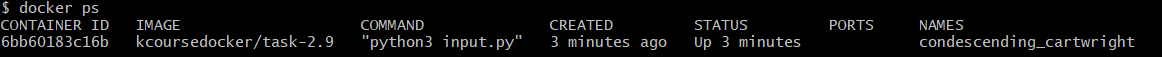

Вывод команды ```docker ps``` указывает, что в контейнере работает программа "python3 input.py", запустим ее



```
winpty docker exec -it 6bb60183c16b python3 input.py
```



### Задание 10

Вы выполнили команду для поднятия контейнера на основе образа ubuntu:

Что произойдет, когда вы выполните команду ```docker exec -it ubuntu bash```?



Ответ: 

Произойдет ошибка, т.к. команду docker exec нельзя выполнить на остановленном контейнере

### Задание 11

Скачайте образ nginx'а с тегом 1.23 (nginx:1.23).

Поднимите контейнер на основе этого образа.

В самом контейнере вам нужно найти файл, который лежит по пути 
/etc/nginx/conf.d/default.conf.

В этом файле вам нужно найти настройку server_name (при помощи, например, утилит cat или grep).
Она находится в секции server.

Решение:

1. Запустим контейнер 
```winpty docker run --name nginx1_23 -d nginx:1.23```

2. Подлючимся к контейнеру используя bash 
```winpty docker exec -it nginx1_23 bash``` 

3. Найдем нужную информацию
```cat /etc/nginx/conf.d/default.conf | grep server```

### Задание 12

Вы взяли 3 образа Go:

golang:1.18
golang:1
golang:latest

Что произойдет после выполнения команды:

```
docker rmi $(echo $(docker images --format '{{.Repository}}:{{.Tag}}' | grep golang | grep -v golang:latest))
```

Ответ: 

Останется только образ golang:latest 

Посольку grep -v оставит все строки кроме golang:latest

(-v - инвертировать поиск, выдавать все строки кроме тех, что содержат шаблон)


# Урок 3

Dockerfile - кастомная инструкция по сборке контейнера на основе готового образа, т.е. мы берем базовый образ и указываем что с ним нужно сделать.

Пример Dockerfile:

``` FROM node:17 ``` Сборка образца на основе образа node:17

``` COPY ./script.js /app/script.js ``` Перемещаем наш скрипт в контейнер

``` CMD ["node", "/app/script.js"] ``` Запускаем наше приложение

CMD vs ENTRYPOINT


```
 ENTRYPOINT ["curl", "-I", "https://karpov.courses/"] 
```

Результат всех трех команд будет одинаковым.
Отличия будут например если в команду docker run добавить аргументы:

```
ENTRYPOINT: docker run --rm test_start/cmd google.com 

```
== ```curl -I hhtps://karpov.courses/ www.google.com```

В результате будет два запроса - один на гугл, другой на карпов.курсы.

```
 CMD ["curl", "-I", "https://karpov.courses/"] 
```

При использовании CMD, если мы передадим в качестве аргумента google.com, то мы упадем с ошибкой. Но если добавим команду, то ошибки не будет.

То есть при использовании команды CMD содержимое команды будет заменяться аргументами при запуске.

```
CMD: docker run --rm test_start/cmd curl google.com

```

При совмещении обеих команд: 

```
 ENTRYPOINT [ "curl" ] 
 CMD [ "-I", "https://karpov.courses/" ] 
```

К команде указаной в ENTRYPOINT будет добавляться, то что указано в CMD или аргументах при запуске.

## Проблемы переиспользования слоев

```
FROM ubuntu:20.04
RUN echo "Hello!"
```

```
FROM ubuntu:20.04
RUN echo "Hello!"
RUN echo ":)"
```

При запуске второго контейнера докер переиспользует слой из первого и в итоге выведет только смайлик. 

Это проблема может всплыть например при обнолении пакетов:
```
FROM ubuntu:20.04
RUN apt-get update
RUN apt-get install -y vim
RUN apt-get install -y git
```
При создании нового образа, докер возьмет кэш от предыдущего и команда apt-get update не выполнится, что приведет к устаревшим пакетам. Чтобы избежать этого, команды объединяют, таким образом они будут на одном слое.

```
FROM ubuntu:20.04
RUN apt-get update && apt-get install -y vim git
```

При создании контейнеров не следует объединять установку зависимостей и запуск приложения: 
```
FROM python
COPY ./ ./
RUN python -m pip install --upgrade pip && pip install -r requirements.txt
ENTRYPOINT [ "python", "app.py"]
```

Лучше выделить блок для обновления зависимостей, поскольку они обновляются не так часто как приложение. И обновлять их при каждом запуске не целесообразно. Выделив в отдельный слой, этот кусок будет кэшировать: 

```
FROM python
COPY ./requirements.txt ./requirements.txt
RUN python -m pip install --upgrade pip && pip install -r requirements.txt

COPY ./app.py ./app.py
ENTRYPOINT [ "python", "app.py"]
```

Слой с копированием файла приложения будет выполняться каждый раз так, как файлы будет отличаться.

## Best practices

- Используйте .dockerignore файл
- Устанавливайте только то, что действительно нужно
- Старайтесь уменьшить количество слоев: 

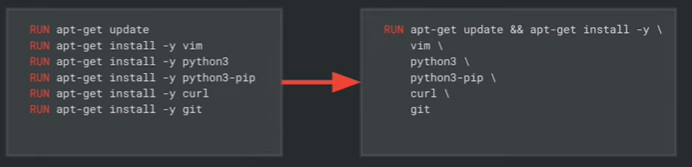

## Создаем Dockerfile

``` docker build -t <Имя>:<Тэг> <директория>``` 

Опция t - задаем имя и тэг образа

Опция f позволяет указать конкретный файл для сборки образа

```
FROM ubuntu:20.04

WORKDIR /home/test
```

ADD и COPY позволяет копировать файлы с нашего компьютера в контейнер

Инструкция RUN позволяет запустить произовльный скрипт

При создании Dockerfile следует учитывать порядок слоев. Общие слои стоит выносить в начало файла для того, чтобы другие образы могли использовать их из кэша.

В файле .dockerignore указываются файлы и папки, которые не будут отправляться демону. 


```docker build -t <имя_образа:тег> <путь>``` — создать образ с именем и тегом

```docker build -t <имя_образа:тег> <путь> -f <Докер файл>``` — создать образ с именем и тегом

## Практика

###Задание 2


```
RUN echo "Start build"
FROM python:3.8
RUN python -m pip install --upgrade pip \
    && pip install click==8.1.2 \
    && pip install Flask==2.1.1 \
    && pip install Flask-Cors==3.0.10 \
    && pip install Flask-SQLAlchemy==2.5.1 \
    && pip install greenlet==1.1.2 \
    && pip install gunicorn==20.1.0 \
    && pip install importlib-metadata==4.11.3 \
    && pip install itsdangerous==2.1.2 \
    && pip install Jinja2==3.1.1 \
    && pip install MarkupSafe==2.1.1 \
    && pip install psycopg2-binary==2.9.3 \
    && pip install six==1.16.0 \
    && pip install SQLAlchemy==1.4.34 \
    && pip install Werkzeug==2.1.0 \
    && pip install zipp==3.7.0

copy ./app.py /src/app.py
ENTRYPOINT python3 app.py
```

* Dockerfile не может начинаться с инструкции RUN! Это логично, ведь где выполнять команду, если базовый образ для контейнера не выбран

* Инструкции лучше писать в верхнем регистре (как в SQL)

* Надо быть аккуратным при указании путей в ENTRYPOINT. Приложение для запуска могут не найти))

# Урок 4

Для синхронизации файлов в контейнере с хостом используют: 
1. Bind mount 
  - Монтирование файлов / папок, которые находятся в любом месте на хосте
  - Используются, чтобы прокинуть файлы / папки в котейнер
  - Нужно использовать полный путь (учитывая особенности ОС)

2. VOLUME (Контролируется докером)
  С ними можно работать через докер. Некое спец. хранилище
  - Монтрирование папок, находящихся в специально отведенном месте
    (/var/lib/docker/volumes/)
  - Используется, чтобы сохранить данные из контейнера


- Volumes не зависят от хоста
- Volumes более безопасны
- Volumes находятся в специально отведенном месте
- Volumes позволяют связывать только папки

Volumes для сохранения данных

Bind mount для файлов настроек, какие-то опреденные файлы

- За Volumes нужно следить так, как они съедают место на диске.
- Volumes бывают именнованные и неименованные. 
- Неименованные Volumes могут создаваться при поднятие контейнеров автоматически!!!

```docker cp <путь на хосте> <контейнер>:<путь в контейнере>``` - копирование файлов в запущенный контейнер

```docker volume ls```

```docker volume create <Имя>```

```docker volume rm <имя>```

```docker volume prune``` - удалить все не используемые

```docker run -v <имя volume>:<путь в контейнере> ```

В контейнере мы по умолчанию работаем как суперпользователь!

- Не монтировать системные папки
- Лучше монтировать только те файлы, которые будет использовать наш контейнер

```docker run -v <путь_на_хосте>:<путь_в_контейнере>:ro <образ>``` - параметр ro устанавливает режим read only

## Практика

### Задача 1

Dockerfile:
```
FROM ubuntu:22.04
WORKDIR /app
COPY script.sh script.sh
COPY names.txt names.txt
ENTRYPOINT ["bash", "script.sh"]
```

Script.txt:
```
if [ ! -e names.txt ]; then
    echo "Не могу найти файл 'names.txt'"
    exit 1
fi
cat names.txt | awk '{print "Hello, "$1}'
```

Команда на запуск: 
```docker run --rm task4.1```

Редактирование файла names.txt на результат не повлияет так, как файл на локальном компьютере не синхронизирован с файлов в контейнере 

### Задание 2

Команды ниже исправят ситуацию из задания выше: 

```docker run --rm -v $(pwd)/names.txt:/app/names.txt <образ>```

```docker run --rm --volume $(pwd)/names.txt:/app/names.txt <образ>```

# Урок 5: Переменные окружения

## Теория:

## Практика

Хранение секретных данных: 

1. Конфигурационный файл через mount
2. Переменные окружения

Dockerfile:

Команда ```ENV``` позволяет задавать переменные окружения.
Например, так можно задавать значение переменных окружения по умолчанию.


```docker run -it --rm -e ENV_VAR=42 ubuntu``` - такая команда позволит передать переменную окружения в контейнер не записывая ее в докер файл